In [25]:
from numpy import mean
from numpy import std
from pandas import read_csv
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline


In [2]:
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')


In [3]:
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]


In [4]:
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])


In [5]:
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [6]:
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.866 (0.052)


>1 0.867 (0.052)
>3 0.858 (0.058)
>5 0.862 (0.057)
>7 0.863 (0.052)
>9 0.864 (0.056)
>15 0.863 (0.053)
>18 0.850 (0.054)
>21 0.858 (0.056)


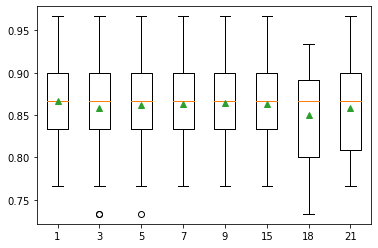

In [20]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [28]:
X = pd.DataFrame(X)
y

array([2., 2., 2., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 2.,
       2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 2., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 2.,
       1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2.,
       2., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2., 1.,
       2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       2., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1.,
       2., 1., 2., 2., 1., 2., 2., 1., 1., 2., 1., 1., 2., 2., 2., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 1., 1., 1., 2.,
       1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 1., 2., 1., 1., 1., 2.,
       1., 1., 1., 1., 2.

In [11]:
# knn imputation strategy and prediction for the hose colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier

In [12]:
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=21)), ('m', RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


In [56]:
import os

In [58]:
table = read_csv('all_in_one.csv')
data = table.drop(['Unnamed: 0','Local Authority code','Local Authority name'],axis=1)
imputer = KNNImputer(n_neighbors=2)
data = data.replace('..', nan)
imputed_data = imputer.fit_transform(data)
imputed_data = pd.DataFrame(imputed_data)
imputed_data.columns = data.columns
cwd = os.getcwd()
imputed_data.to_csv(os.path.join(cwd, "ResultTables/imputed_all_in_one.csv"))  